In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys, os
sys.path.append(os.path.abspath('../src'))

from preprocessing import prepare_for_modeling


df = pd.read_csv('../data/customer_churn.csv')
df.head()


,Customer ID,Name,Gender,Age,Country,Product Purchased,Purchase Amount,Last Purchase Date,Membership Status,Feedback Score,Login Frequency,IsActiveMember,Customer Support Calls,Churn (Target Variable)
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Michael Stephens,Other,56,USA,Accessories,1914.24,2024-12-15,Gold,9,14,1,8,0
1,23b8c1e9-3924-46de-beb1-3b9046685257,Heather Sanders,Male,69,Germany,Tablet,1502.00,2025-03-06,Gold,10,15,1,0,1
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Bryan Charles,Male,46,Australia,Tablet,1153.27,2025-03-18,Platinum,6,4,1,0,1
3,972a8469-1641-4f82-8b9d-2434e465e150,Matthew May,Other,32,USA,Smartwatch,1262.27,2024-09-25,Gold,2,26,0,0,0
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Alison Buchanan,Female,60,Australia,Tablet,897.24,2025-03-13,Silver,7,19,0,2,0


In [29]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer ID              500 non-null    object 
 1   Name                     500 non-null    object 
 2   Gender                   500 non-null    object 
 3   Age                      500 non-null    int64  
 4   Country                  500 non-null    object 
 5   Product Purchased        500 non-null    object 
 6   Purchase Amount          500 non-null    float64
 7   Last Purchase Date       500 non-null    object 
 8   Membership Status        373 non-null    object 
 9   Feedback Score           500 non-null    int64  
 10  Login Frequency          500 non-null    int64  
 11  IsActiveMember           500 non-null    int64  
 12  Customer Support Calls   500 non-null    int64  
 13  Churn (Target Variable)  500 non-null    int64  
dtypes: float64(1), int64(6), o

,Age,Purchase Amount,Feedback Score,Login Frequency,IsActiveMember,Customer Support Calls,Churn (Target Variable)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,44.220000,1050.797100,5.388000,14.414000,0.522000,4.426000,0.532000
std,15.036082,559.696804,2.939854,8.622953,0.500016,2.812177,0.499475
min,18.000000,108.800000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,560.662500,3.000000,7.000000,0.000000,2.000000,0.000000
50%,45.000000,1056.225000,5.000000,14.000000,1.000000,4.000000,1.000000
75%,57.000000,1536.047500,8.000000,22.000000,1.000000,7.000000,1.000000
max,69.000000,1999.460000,10.000000,29.000000,1.000000,9.000000,1.000000


<Axes: xlabel='Churn (Target Variable)', ylabel='count'>

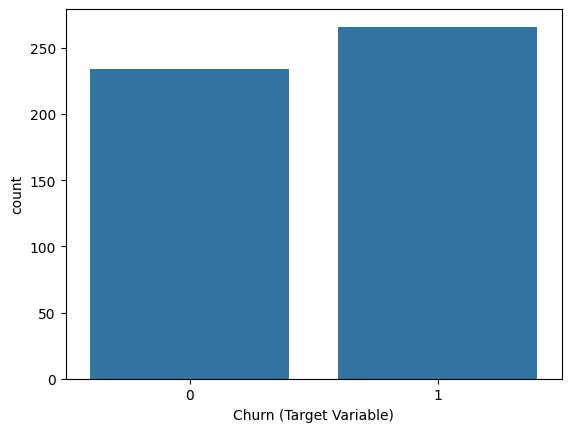

In [30]:
sns.countplot(x='Churn (Target Variable)', data=df)


<Axes: xlabel='Membership Status'>

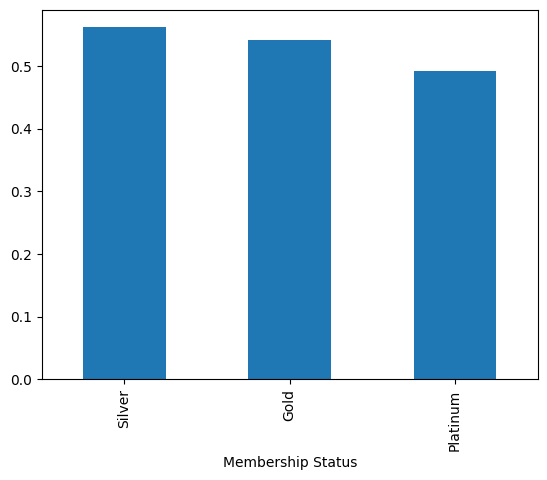

In [31]:
df.groupby('Membership Status')['Churn (Target Variable)'].mean().sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='Product Purchased'>

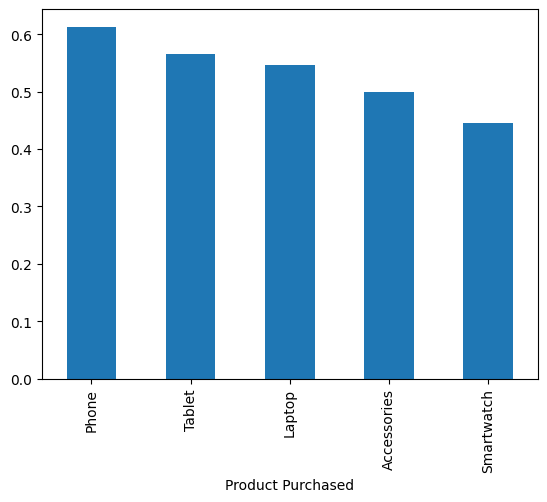

In [32]:
df.groupby('Product Purchased')['Churn (Target Variable)'].mean().sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='Churn (Target Variable)', ylabel='Feedback Score'>

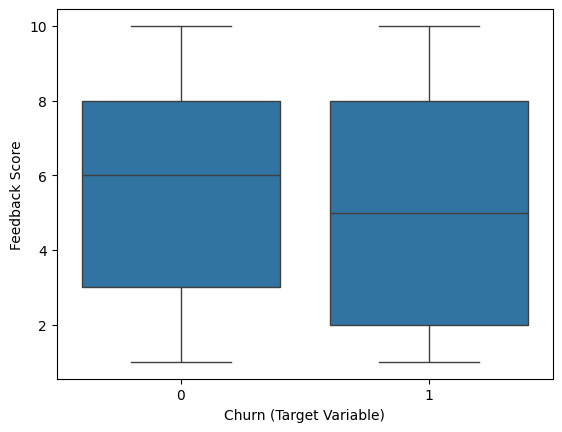

In [33]:
sns.boxplot(x='Churn (Target Variable)', y='Feedback Score', data=df)


<Axes: xlabel='Churn (Target Variable)', ylabel='Login Frequency'>

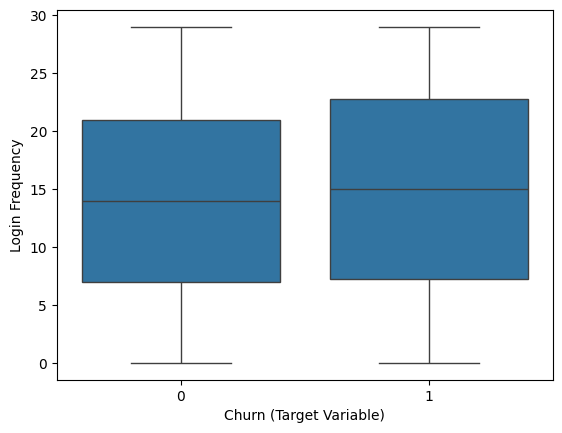

In [34]:
sns.boxplot(x='Churn (Target Variable)', y='Login Frequency', data=df)


In [35]:
Xy, _ = prepare_for_modeling('../data/customer_churn.csv', fit=True)
X = Xy.drop(columns=['Churn (Target Variable)'])
y = Xy['Churn (Target Variable)']


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.56      0.44      0.49        43
           1       0.64      0.74      0.68        57

    accuracy                           0.61       100
   macro avg       0.60      0.59      0.59       100
weighted avg       0.60      0.61      0.60       100

